### Project Problem and Hypothesis
----------------------------------

Overall, I am interested in using comprehensive molecular and clinical data in order to make predictions for patient treatment and prognosis for diseases such as cancer.  Significant advances in technology have not only advanced the ability to process large amounts of data but in the field of biomedicine, has also advanced the speed at which data and the type of data that can be gathered at low costs.  High-throughput sequencing technologies allow researchers to extract information on the expression of entire genomes. For example, gene expression profiling by DNA microarray technology has enabled the classification of different cancers into distinct subgroups, providing insight in areas including cancer cell origin and tumor environment status[1-2].  For breast cancer alone, at least five molecular subgroups have been identified (basal-like, normal-like, HER2-positive, and luminal A and luminal B). One reason understanding the various subgroups of a disease based on its molecular signature is important is because it suggests that there may be therapeutic treatments that can be developed to specifically target each subtype.  Breast cancer is the second most common cancer in women after skin cancer, and it is estimated that in 2016 there will be 246,600 new cases of breast cancer in the US in 2016, contributing to 14.6% of all new cases of cancer and 6.8% of deaths in 2016.  Using I would like to perform a proof-of-concept study to determine the genomic, histological, and clinical factors to predict breast cancer type and prognosis.  I will use logistic regression and KMeans clustering to determine if a breast cancer subtype can be determined based on relative RNA expression.  While molecular signatures of breast cancer is not a new topic, I would like to use this proof-of-concept study as a springboard to 
What's the project about? What problem are you solving?
Where does this seem to reside as a machine learning problem? Are you predicting some continuous number, or predicting a binary value?
What kind of impact do you think it could have?
What do you think will have the most impact in predicting the value you are interested in solving for?


1. Eisen, M.B. and Patrick O. Brown. DNA arrays for analysis of gene expression. _Methods in Enzymology_  http://www.sciencedirect.com/science/article/pii/S0076687999030141
2. Perou, C.M. et al. Molecular portraits of human breast tumours. _Nature_ http://www.nature.com/nature/journal/v406/n6797/full/406747a0.html
3. Winslow, S. et al. Prognostic stromal gene signatures in breast cancer. _Breast Cancer Research_ https://breast-cancer-research.biomedcentral.com/articles/10.1186/s13058-015-0530-2
4. Sorlie, T. Repeated observation of breast tumor subtypes in independent gene expression data sets. _PNAS_  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC166244/

### Datasets
----------------------------------

The Cancer Genome Atlas (TCGA) is a National Institutes of Health and National Human Genome Institute project using high-throughput genomics technologies to characterize the genetic landscape of various human cancers in order to understand the genetic bases for human cancers, with the ultimate goal of improving diagnosis, treatment, and prevention. Over two petabytes of data spanning 33 tumor types and 10 rare cancers from over 11,000 eligible volunteers has been gathered. Biotechniques used to gather molecular profiles on participant biospecimen include gene expression profiling, copy number variation profiling, SNP genotyping, genome wide DNA methylation profiling, microRNA profiling, and exon sequencing of at least 1,200 genes.  

This dataset consists of several tables:

In [23]:
import datalab.bigquery as bq


In [2]:
import datalab.bigquery as bq

d = bq.Dataset('isb-cgc:tcga_201607_beta')
for t in d.tables():
  print '%10d rows   %s' % (t.metadata.rows, t.name.table_id)

      6322 rows   Annotations
     23797 rows   Biospecimen_data
     11160 rows   Clinical_data
   2646095 rows   Copy_Number_segments
3944304319 rows   DNA_Methylation_betas
 382335670 rows   DNA_Methylation_chr1
 197519895 rows   DNA_Methylation_chr10
 235823572 rows   DNA_Methylation_chr11
 198050739 rows   DNA_Methylation_chr12
  97301675 rows   DNA_Methylation_chr13
 123239379 rows   DNA_Methylation_chr14
 124566185 rows   DNA_Methylation_chr15
 179772812 rows   DNA_Methylation_chr16
 234003341 rows   DNA_Methylation_chr17
  50216619 rows   DNA_Methylation_chr18
 211386795 rows   DNA_Methylation_chr19
 279668485 rows   DNA_Methylation_chr2
  86858120 rows   DNA_Methylation_chr20
  35410447 rows   DNA_Methylation_chr21
  70676468 rows   DNA_Methylation_chr22
 201119616 rows   DNA_Methylation_chr3
 159148744 rows   DNA_Methylation_chr4
 195864180 rows   DNA_Methylation_chr5
 290275524 rows   DNA_Methylation_chr6
 240010275 rows   DNA_Methylation_chr7
 164810092 rows   DNA_Methylati

I will be focusing on the following tables: 

Table Name|Info
 --- |---
Annotations| annotations and related information
Biospecimen_data | (sample-centric table) contains one row of information for each sample
Clinical_data | (patient-centric table) contains one row of information for each TCGA patient
mRNA_UNC_HiSeq_RSEM | contains gene expression data fromsamples assayed on the Illumina HiSeq platform and processed through the UNC “RNASeqV2” RSEM pipeline. Each row in this table contains the RSEM expression estimate for a single gene in a single aliquot. 


Here's a peek into each of the four tables:

**Annotations:**

In [3]:
bq.Table('isb-cgc:tcga_201607_beta.Annotations').schema

[{ 'name': 'annotationId', 'type': 'INTEGER', 'mode':'None', 'description': 'each annotation was assigned a unique (integer) identifier' },
 { 'name': 'annotationCategoryId', 'type': 'INTEGER', 'mode':'None', 'description': 'there are 38 different "annotation categories", each of which has a unique (integer) identifier' },
 { 'name': 'annotationCategoryName', 'type': 'STRING', 'mode':'None', 'description': 'each of the 38 "annotation categories" also has a "name" associated with it, eg "Item is noncanonical", "Item flagged DNU", "Prior malignancy", etc' },
 { 'name': 'annotationClassification', 'type': 'STRING', 'mode':'None', 'description': 'each annotation gets one of four possible "classifications": "Notification", "CenterNotification", "Observation", and "Redaction"' },
 { 'name': 'annotationNoteText', 'type': 'STRING', 'mode':'None', 'description': 'arbitrary note associated with each annotation (this is required for each annotation)' },
 { 'name': 'Study', 'type': 'STRING', 'mode':'None', 'description': 'each annotation is for a specific "item" (which can be a patient, a sample, an aliquot, etc), and this field contains the Study (eg "OV", "GBM', etc) with which that item is associated' },
 { 'name': 'itemTypeName', 'type': 'STRING', 'mode':'None', 'description': 'each annotation is for a specific TCGA "item", and this field specifies what *type* of item it is -- ie, a "Shipped Portion", "Aliquot", "Patient", "Analyte", "Slide", "Sample", or "Portion" --  for more details, refer to the TCGA Encyclopedia at https://wiki.nci.nih.gov/display/TCGA/TCGA+Encyclopedia' },
 { 'name': 'itemBarcode', 'type': 'STRING', 'mode':'None', 'description': 'each annotation is for a specific TCGA "item", and this field specifies the barcode of that item' },
 { 'name': 'AliquotBarcode', 'type': 'STRING', 'mode':'None', 'description': 'this field is frequently null, but if the "itemType" is an Aliquot, then this field will contain the itemBarcode' },
 { 'name': 'ParticipantBarcode', 'type': 'STRING', 'mode':'None', 'description': 'this field contains the participant barcode for each annotation -- even if the annotation relates only to one aliquot from this participant (aka patient)' },
 { 'name': 'SampleBarcode', 'type': 'STRING', 'mode':'None', 'description': 'this field contains the sample barcode for each annotation, unless the annotation is at the patient (aka participant) level' },
 { 'name': 'dateAdded', 'type': 'STRING', 'mode':'None', 'description': 'date that this annotation was added to the annotation database' },
 { 'name': 'dateCreated', 'type': 'STRING', 'mode':'None', 'description': 'date that this annotation was first created' },
 { 'name': 'dateEdited', 'type': 'STRING', 'mode':'None', 'description': 'date that this annotation was last edited' }]

In [4]:
bq.Table('isb-cgc:tcga_201607_beta.Annotations').sample(count=2)

annotationId,annotationCategoryId,annotationCategoryName,annotationClassification,annotationNoteText,Study,itemTypeName,itemBarcode,AliquotBarcode,ParticipantBarcode,SampleBarcode,dateAdded,dateCreated,dateEdited
711,1,Tumor tissue origin incorrect,Redaction,[intgen.org]: Case was of non-ovarian origin,GBM,Patient,TCGA-01-0629,,TCGA-01-0629,,2010-09-02T00:00:00-04:00,2010-09-02T00:00:00-04:00,
713,1,Tumor tissue origin incorrect,Redaction,[intgen.org]: Case was of non-ovarian origin,OV,Patient,TCGA-13-1479,,TCGA-13-1479,,2010-09-02T00:00:00-04:00,2010-09-02T00:00:00-04:00,


---

**Biospecimen Data: **

In [5]:
bq.Table('isb-cgc:tcga_201607_beta.Biospecimen_data').schema

[{ 'name': 'ParticipantBarcode', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'SampleBarcode', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'SampleTypeLetterCode', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'SampleType', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Study', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Project', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'SampleTypeCode', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'avg_percent_lymphocyte_infiltration', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'avg_percent_monocyte_infiltration', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'avg_percent_necrosis', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'avg_percent_neutrophil_infiltration', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'avg_percent_normal_cells', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'avg_percent_stromal_cells', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'avg_percent_tumor_cells', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'avg_percent_tumor_nuclei', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'batch_number', 'type': 'INTEGER', 'mode':'None', 'description': 'None' },
 { 'name': 'bcr', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'days_to_collection', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'days_to_sample_procurement', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'is_ffpe', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'max_percent_lymphocyte_infiltration', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'max_percent_monocyte_infiltration', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'max_percent_necrosis', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'max_percent_neutrophil_infiltration', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'max_percent_normal_cells', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'max_percent_stromal_cells', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'max_percent_tumor_cells', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'max_percent_tumor_nuclei', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'min_percent_lymphocyte_infiltration', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'min_percent_monocyte_infiltration', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'min_percent_necrosis', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'min_percent_neutrophil_infiltration', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'min_percent_normal_cells', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'min_percent_stromal_cells', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'min_percent_tumor_cells', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'min_percent_tumor_nuclei', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'num_portions', 'type': 'INTEGER', 'mode':'None', 'description': 'None' },
 { 'name': 'num_slides', 'type': 'INTEGER', 'mode':'None', 'description': 'None' },
 { 'name': 'SampleUUID', 'type': 'STRING', 'mode':'None', 'description': 'None' }]

In [6]:
bq.Table('isb-cgc:tcga_201607_beta.Biospecimen_data').sample(count=2)

ParticipantBarcode,SampleBarcode,SampleTypeLetterCode,SampleType,Study,Project,SampleTypeCode,avg_percent_lymphocyte_infiltration,avg_percent_monocyte_infiltration,avg_percent_necrosis,avg_percent_neutrophil_infiltration,avg_percent_normal_cells,avg_percent_stromal_cells,avg_percent_tumor_cells,avg_percent_tumor_nuclei,batch_number,bcr,days_to_collection,days_to_sample_procurement,is_ffpe,max_percent_lymphocyte_infiltration,max_percent_monocyte_infiltration,max_percent_necrosis,max_percent_neutrophil_infiltration,max_percent_normal_cells,max_percent_stromal_cells,max_percent_tumor_cells,max_percent_tumor_nuclei,min_percent_lymphocyte_infiltration,min_percent_monocyte_infiltration,min_percent_necrosis,min_percent_neutrophil_infiltration,min_percent_normal_cells,min_percent_stromal_cells,min_percent_tumor_cells,min_percent_tumor_nuclei,num_portions,num_slides,SampleUUID
TCGA-LP-A4AV,TCGA-LP-A4AV-10A,NB,Blood Derived Normal,CESC,TCGA,10,,,,,,,,,256,Nationwide Children's Hospital,413.0,364.0,NO,,,,,,,,,,,,,,,,,1,0,EC08F8EE-DA6A-4CFA-AEE9-07754224FC58
TCGA-LP-A4AX,TCGA-LP-A4AX-10A,NB,Blood Derived Normal,CESC,TCGA,10,,,,,,,,,256,Nationwide Children's Hospital,263.0,2.0,NO,,,,,,,,,,,,,,,,,1,0,AA734CF9-0C3C-4CE2-9C1E-3E3F9866C6D1


---

**Clinical Data:**

In [7]:
bq.Table('isb-cgc:tcga_201607_beta.Clinical_data').schema

[{ 'name': 'ParticipantBarcode', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Study', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Project', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'ParticipantUUID', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'TSSCode', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'age_at_initial_pathologic_diagnosis', 'type': 'INTEGER', 'mode':'None', 'description': 'None' },
 { 'name': 'anatomic_neoplasm_subdivision', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'batch_number', 'type': 'INTEGER', 'mode':'None', 'description': 'None' },
 { 'name': 'bcr', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'clinical_M', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'clinical_N', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'clinical_T', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'clinical_stage', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'colorectal_cancer', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'country', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'vital_status', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'days_to_birth', 'type': 'INTEGER', 'mode':'None', 'description': 'None' },
 { 'name': 'days_to_death', 'type': 'INTEGER', 'mode':'None', 'description': 'None' },
 { 'name': 'days_to_last_known_alive', 'type': 'INTEGER', 'mode':'None', 'description': 'None' },
 { 'name': 'days_to_last_followup', 'type': 'INTEGER', 'mode':'None', 'description': 'None' },
 { 'name': 'days_to_initial_pathologic_diagnosis', 'type': 'INTEGER', 'mode':'None', 'description': 'None' },
 { 'name': 'days_to_submitted_specimen_dx', 'type': 'INTEGER', 'mode':'None', 'description': 'None' },
 { 'name': 'ethnicity', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'gender', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'gleason_score_combined', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'histological_type', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'history_of_colon_polyps', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'history_of_neoadjuvant_treatment', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'hpv_calls', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'hpv_status', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'icd_10', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'icd_o_3_histology', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'icd_o_3_site', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'lymphatic_invasion', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'lymphnodes_examined', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'lymphovascular_invasion_present', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'menopause_status', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'mononucleotide_and_dinucleotide_marker_panel_analysis_status', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'neoplasm_histologic_grade', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'new_tumor_event_after_initial_treatment', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'number_of_lymphnodes_examined', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'number_of_lymphnodes_positive_by_he', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'number_pack_years_smoked', 'type': 'FLOAT', 'mode':'None', 'description': 'None' },
 { 'name': 'year_of_initial_pathologic_diagnosis', 

In [8]:
bq.Table('isb-cgc:tcga_201607_beta.Clinical_data').sample(count=2)

ParticipantBarcode,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,clinical_N,clinical_T,clinical_stage,colorectal_cancer,country,vital_status,days_to_birth,days_to_death,days_to_last_known_alive,days_to_last_followup,days_to_initial_pathologic_diagnosis,days_to_submitted_specimen_dx,ethnicity,gender,gleason_score_combined,histological_type,history_of_colon_polyps,history_of_neoadjuvant_treatment,hpv_calls,hpv_status,icd_10,icd_o_3_histology,icd_o_3_site,lymphatic_invasion,lymphnodes_examined,lymphovascular_invasion_present,menopause_status,mononucleotide_and_dinucleotide_marker_panel_analysis_status,neoplasm_histologic_grade,new_tumor_event_after_initial_treatment,number_of_lymphnodes_examined,number_of_lymphnodes_positive_by_he,number_pack_years_smoked,year_of_initial_pathologic_diagnosis,pathologic_M,pathologic_N,pathologic_T,pathologic_stage,person_neoplasm_cancer_status,pregnancies,primary_neoplasm_melanoma_dx,primary_therapy_outcome_success,psa_value,race,residual_tumor,tobacco_smoking_history,tumor_tissue_site,tumor_type,weight,height,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
TCGA-AB-2959,LAML,TCGA,31ac4afd-8195-479a-97da-92edaa89a85e,AB,71,,25,Washington University,,,,,,,Dead,-26114,489,489,,0,,NOT HISPANIC OR LATINO,MALE,,,,No,,,,,,,,,,,,,,,,2007,,,,,,,,,,WHITE,,,Bone Marrow,,,,,,,,,,,,,
TCGA-AB-2957,LAML,TCGA,c887d68c-da8e-4f15-a524-3b6674b145ed,AB,31,,25,Washington University,,,,,,,Alive,-11626,,609,609,0,,NOT HISPANIC OR LATINO,MALE,,,,Yes,,,,,,,,,,,,,,,,2007,,,,,,,,,,WHITE,,,Bone Marrow,,,,,,,,,,,,,


---

**mRNA Expression data: **

In [9]:
bq.Table('isb-cgc:tcga_201607_beta.mRNA_UNC_HiSeq_RSEM').schema

[{ 'name': 'ParticipantBarcode', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'SampleBarcode', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'AliquotBarcode', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Study', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'SampleTypeLetterCode', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'Platform', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'original_gene_symbol', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'HGNC_gene_symbol', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'gene_id', 'type': 'INTEGER', 'mode':'None', 'description': 'None' },
 { 'name': 'normalized_count', 'type': 'FLOAT', 'mode':'None', 'description': 'None' }]

In [10]:
bq.Table('isb-cgc:tcga_201607_beta.mRNA_UNC_HiSeq_RSEM').sample(count=2)

ParticipantBarcode,SampleBarcode,AliquotBarcode,Study,SampleTypeLetterCode,Platform,original_gene_symbol,HGNC_gene_symbol,gene_id,normalized_count
TCGA-04-1348,TCGA-04-1348-01A,TCGA-04-1348-01A-01R-1565-13,OV,TP,IlluminaHiSeq,AADACL2,AADACL2,344752,0.0
TCGA-04-1348,TCGA-04-1348-01A,TCGA-04-1348-01A-01R-1565-13,OV,TP,IlluminaHiSeq,ABCA5,ABCA5,23461,62.6513


In [11]:
print bq.Table('isb-cgc:tcga_201607_beta.mRNA_UNC_HiSeq_RSEM').schema

[{u'type': u'STRING', u'name': u'ParticipantBarcode'}, {u'type': u'STRING', u'name': u'SampleBarcode'}, {u'type': u'STRING', u'name': u'AliquotBarcode'}, {u'type': u'STRING', u'name': u'Study'}, {u'type': u'STRING', u'name': u'SampleTypeLetterCode'}, {u'type': u'STRING', u'name': u'Platform'}, {u'type': u'STRING', u'name': u'original_gene_symbol'}, {u'type': u'STRING', u'name': u'HGNC_gene_symbol'}, {u'type': u'INTEGER', u'name': u'gene_id'}, {u'type': u'FLOAT', u'name': u'normalized_count'}]


### Domain knowledge
---

While my PhD is in cancer biology, I studied melanoma (a type of skin cancer).  I'm familiar with the proper resources to fill in gaps in knowledge (PubMed).  I need to conduct additional research on how to normalize mRNA expression data.  

Resources:
- Tutorial: Machine Learning For Cancer Classification - Part 1 - Preparing The Data Sets https://www.biostars.org/p/85124/
- Tutorial: Machine Learning For Cancer Classification - Part 2 - Building A Random Forest Classifier https://www.biostars.org/p/86981/
- Tutorial: Machine Learning For Cancer Classification - Part 3 - Predicting With A Random Forest Classifier https://www.biostars.org/p/87110/
- Tutorial: Machine Learning For Cancer Classification - Part 4 - Plotting A Kaplan-Meier Curve For Survival Analysis https://www.biostars.org/p/87580/
- Seq-ing improved gene expression estimates from microarrays using machine learning https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-015-0712-z



### Project Concerns
---

- Given time, what's a reasonable, attainable goal?
- How should I further narrow the scope of the project without losing the project's appeal (to me)?
- Ensuring results are scientifically sound
    - trying to pinpoint the correct way to normalize the mRNA expression data
- Finding the best references to which I can compare my results


### Outcomes
---

I expect the outcomes to hopefully mirror previous research.  I believe that this will be a marker of success.  Any deviations from what has been published should at least make biological sense.  If the project is a bust, which, I believe may be due to mRNA expression issues,then i will see what can be uncovered solely from the clinical data.  My target audience would be other scientists and people interested in cancer research. 


----
early data exploration:

In [12]:
bq.Table('isb-cgc:tcga_201607_beta.Clinical_data').sample(count=2)

ParticipantBarcode,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,clinical_N,clinical_T,clinical_stage,colorectal_cancer,country,vital_status,days_to_birth,days_to_death,days_to_last_known_alive,days_to_last_followup,days_to_initial_pathologic_diagnosis,days_to_submitted_specimen_dx,ethnicity,gender,gleason_score_combined,histological_type,history_of_colon_polyps,history_of_neoadjuvant_treatment,hpv_calls,hpv_status,icd_10,icd_o_3_histology,icd_o_3_site,lymphatic_invasion,lymphnodes_examined,lymphovascular_invasion_present,menopause_status,mononucleotide_and_dinucleotide_marker_panel_analysis_status,neoplasm_histologic_grade,new_tumor_event_after_initial_treatment,number_of_lymphnodes_examined,number_of_lymphnodes_positive_by_he,number_pack_years_smoked,year_of_initial_pathologic_diagnosis,pathologic_M,pathologic_N,pathologic_T,pathologic_stage,person_neoplasm_cancer_status,pregnancies,primary_neoplasm_melanoma_dx,primary_therapy_outcome_success,psa_value,race,residual_tumor,tobacco_smoking_history,tumor_tissue_site,tumor_type,weight,height,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
TCGA-AB-2959,LAML,TCGA,31ac4afd-8195-479a-97da-92edaa89a85e,AB,71,,25,Washington University,,,,,,,Dead,-26114,489,489,,0,,NOT HISPANIC OR LATINO,MALE,,,,No,,,,,,,,,,,,,,,,2007,,,,,,,,,,WHITE,,,Bone Marrow,,,,,,,,,,,,,
TCGA-AB-2957,LAML,TCGA,c887d68c-da8e-4f15-a524-3b6674b145ed,AB,31,,25,Washington University,,,,,,,Alive,-11626,,609,609,0,,NOT HISPANIC OR LATINO,MALE,,,,Yes,,,,,,,,,,,,,,,,2007,,,,,,,,,,WHITE,,,Bone Marrow,,,,,,,,,,,,,


In [13]:
ds = bq.Table('isb-cgc:tcga_201607_beta.Clinical_data').to_dataframe()

In [14]:
ds.Study.unique()

array(['LAML', 'HNSC', 'SKCM', 'COAD', 'READ', 'THYM', 'SARC', 'UCS',
       'PRAD', 'THCA', 'DLBC', 'ESCA', 'STAD', 'LIHC', 'CHOL', 'PAAD',
       'LUAD', 'LUSC', 'PCPG', 'MESO', 'OV', 'BRCA', 'CESC', 'UCEC',
       'TGCT', 'KIRP', 'KIRC', 'KICH', 'BLCA', 'LGG', 'GBM', 'ACC', 'UVM'], dtype=object)

In [15]:
import pandas as pd
pd.options.display.max_columns = 100

In [16]:
ds[(ds.Study == 'BRCA')].histological_type.unique()

array(['Infiltrating Ductal Carcinoma', 'Other, specify',
       'Mucinous Carcinoma', 'Infiltrating Lobular Carcinoma',
       'Mixed Histology (please specify)', 'Metaplastic Carcinoma',
       'Infiltrating Carcinoma NOS', 'Medullary Carcinoma'], dtype=object)

In [17]:
print ds[(ds.Study == 'BRCA')].pathologic_stage.unique()

['Stage IIA' 'Stage IIB' 'Stage I' 'Stage IIIA' 'Stage IA' 'Stage X'
 'Stage IV' 'Stage IIIB' 'Stage IIIC' 'Stage IB' None 'Stage III'
 'Stage II']


In [18]:
ds[(ds.Study == 'BRCA')].count()

ParticipantBarcode                      1097
Study                                   1097
Project                                 1097
ParticipantUUID                         1097
TSSCode                                 1097
age_at_initial_pathologic_diagnosis     1096
anatomic_neoplasm_subdivision           1097
batch_number                            1097
bcr                                     1097
clinical_M                                 0
clinical_N                                 0
clinical_T                                 0
clinical_stage                             0
colorectal_cancer                          0
country                                  696
vital_status                            1097
days_to_birth                           1081
days_to_death                            149
days_to_last_known_alive                1096
days_to_last_followup                    947
days_to_initial_pathologic_diagnosis    1096
days_to_submitted_specimen_dx              0
ethnicity 

In [19]:
new_ds = ds[['ParticipantBarcode', 'Study', 'Project', 'ParticipantUUID', 'TSSCode', 'age_at_initial_pathologic_diagnosis', 'anatomic_neoplasm_subdivision', 'batch_number',
            'bcr','vital_status', 'days_to_birth', 'days_to_last_known_alive', 'days_to_initial_pathologic_diagnosis', 'gender', 'histological_type', 
             'history_of_neoadjuvant_treatment', 'year_of_initial_pathologic_diagnosis', 'pathologic_M', 'pathologic_N', 'pathologic_T', 'pathologic_stage',
             'person_neoplasm_cancer_status', 'race', 'tumor_tissue_site', 'other_dx'
            ]]


In [20]:
new_ds.tumor_tissue_site.value_counts()

Breast                                                     1098
Lung                                                       1026
Kidney                                                      941
Brain                                                       599
Ovary                                                       582
Head and Neck                                               565
Endometrial                                                 547
Central nervous system                                      515
Thyroid                                                     509
Prostate                                                    500
Colon                                                       460
Stomach                                                     445
Bladder                                                     412
Liver                                                       378
Cervical                                                    307
Bone Marrow                             

In [21]:
new_ds.age_at_initial_pathologic_diagnosis.describe()

count    11109.000000
mean        59.099019
std         14.415440
min         10.000000
25%         50.000000
50%         60.000000
75%         70.000000
max         90.000000
Name: age_at_initial_pathologic_diagnosis, dtype: float64

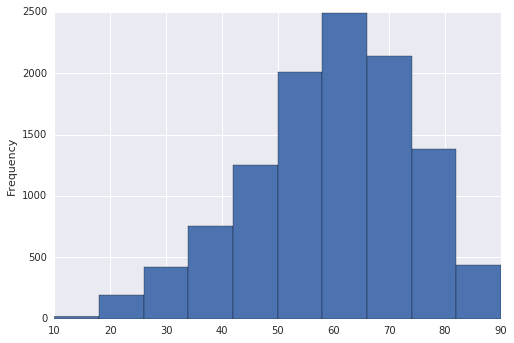

In [22]:
new_ds.age_at_initial_pathologic_diagnosis.plot.hist()